In [1]:
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import src.utils.time
import src.utils.dict
import src.utils.comps
import src.utils.module
import src.utils.json

import src.comps.heads_pyramid_2

In [2]:
tab20_color_list =\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[0::2]] +\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[1::2]]

---

In [3]:
exp_data_all = {}

In [4]:
data_subdir_name = "ret_train"
backbone_name = "convnext_t"
exp_name_list = [
    "test_002"
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "exp_data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [5]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "convnext_t_s1"
exp_name_list = [
    "exp_{:03d}".format(idx) for idx in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [6]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "convnext_t_s2"
exp_name_list = [
    "exp_{:03d}".format(idx) for idx in [0, 6, 7, 8, 9, 11]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [7]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "convnext_v2_t_s1"
exp_name_list =\
    ["head_{:03d}_exp_{:03d}".format(head_idx, exp_idx) for head_idx in [0] for exp_idx in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]] +\
    ["head_{:03d}_exp_{:03d}".format(head_idx, exp_idx) for head_idx in [6] for exp_idx in [0, 1, 2, 3, 4, 5]] +\
    ["head_{:03d}_exp_{:03d}".format(head_idx, exp_idx) for head_idx in [1, 2] for exp_idx in [6, 7, 8, 14, 15]] +\
    ["head_{:03d}_exp_{:03d}".format(head_idx, exp_idx) for head_idx in [3, 4, 5, 7, 8, 9, 10, 11] for exp_idx in [6, 7, 8]]
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [8]:
exp_data_all.keys()

dict_keys(['ret_train', 'ret_train_old_smpl'])

In [9]:
exp_data_all["ret_train_old_smpl"].keys()

dict_keys(['convnext_t_s1', 'convnext_t_s2', 'convnext_v2_t_s1'])

---

In [33]:
def plot_losses(
    exp_name_list,
    exp_data_list,
    head_idx,
    num_epochs=5
):

    fig, axs = plt.subplots(nrows=2, figsize=(20, 10))

    # Baseline

    exp_data = exp_data_all["ret_train"]["convnext_t"]["test_002"]

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:num_epochs]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:num_epochs]

    finished = exp_data["results"]["stage_1"]["finished"]

    label = "Baseline"

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color="black", marker=".", linestyle="--")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color="black", marker=".", linestyle="--")

    #print("{:20s} | {:s}".format(label, np.format_float_scientific(val_loss_list[-1], precision=6, exp_digits=1)))

    print("Baseline", ":", val_loss_list)

    # Experiments ret_train_old_smpl/convnext_t_s1

    for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["convnext_t_s1"].items()):

        if exp_name not in ["exp_000", "exp_006"]:
            continue

        # Load data

        train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
        val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

        train_loss_list = train_loss_list[:min(num_epochs, len(train_loss_list))]
        val_loss_list = val_loss_list[:min(num_epochs, len(val_loss_list))]

        finished = exp_data["results"]["stage_1"]["finished"]
        base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

        head_class = exp_data["settings"]["head"]["class"]
        head_order = "BU" if "BottomUp" in head_class else "TD"
        head_speed = "Inst" if "Instant" in head_class else "Prog"
        head_du_mode = "Simple" if "Simple" in head_class else "Conv"
        if head_speed == "Prog":
            head_weight = "Early" if exp_data["settings"]["head"]["emb_sizes"][0] == 512 else "Late"
        else:
            head_weight = ""

        # Title

        title_lines = []    
        title_lines.append("{:s}".format(exp_name))
        if not finished: title_lines[-1] += " | Unifinished"
        title_lines.append("ConvNeXt-T")
        title_lines.append("{:2s} {:4s} {:6s} {:5s}".format(
            head_order,
            head_speed,
            head_du_mode,
            head_weight
        ))
        title_lines.append("LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))

        label = "\n".join(title_lines)
        
        print(exp_name, ":", val_loss_list)

        # Plot

        axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".", color="gray", linestyle="--")
        axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".", color="gray", linestyle="--")

    # Experiments ret_train_old_smpl/convnext_v2_t_s1

    for exp_name, exp_data in zip(exp_name_list, exp_data_list):

        # Load data

        train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
        val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

        train_loss_list = train_loss_list[:min(num_epochs, len(train_loss_list))]
        val_loss_list = val_loss_list[:min(num_epochs, len(val_loss_list))]

        finished = exp_data["results"]["stage_1"]["finished"]
        base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

        head_class = exp_data["settings"]["head"]["class"]
        head_order = "BU" if "BottomUp" in head_class else "TD"
        head_speed = "Inst" if "Instant" in head_class else "Prog"
        head_du_mode = "Simple" if "Simple" in head_class else "Conv"
        if head_speed == "Prog":
            head_weight = "Early" if exp_data["settings"]["head"]["emb_sizes"][0] == 512 else "Late"
        else:
            head_weight = ""

        # Title

        title_lines = []    
        title_lines.append("{:s}".format(exp_name))
        if not finished: title_lines[-1] += " | Unifinished"
        title_lines.append("ConvNeXtV2-T")
        title_lines.append("{:2s} {:4s} {:6s} {:5s}".format(
            head_order,
            head_speed,
            head_du_mode,
            head_weight
        ))
        title_lines.append("LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))

        label = "\n".join(title_lines)

        """
        print("{:20s} | {:s} | {:s}".format(
            exp_name,
            np.format_float_scientific(base_lr, precision=2, exp_digits=1, min_digits=2),
            np.format_float_scientific(val_loss_list[-1], precision=6, exp_digits=1)
        ))
        """
        
        # Plot

        axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
        axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

        print(exp_name, ":", val_loss_list)

    # Generic settings

    axs[0].set_yscale("log")
    axs[1].set_yscale("log")

    axs[0].grid()
    axs[1].grid()

    axs[0].set_title("Train loss")
    axs[1].set_title("Val loss")

    plt.suptitle("ConvNeXt-Tiny + Feature Fusion Head {:d} - Stage 1 Train/Val Loss - Old Negative Sampling".format(head_idx))
    plt.legend(prop={'family': 'monospace', "size": 10}, bbox_to_anchor=(1.15, 1.85))
    plt.show()

Baseline : [0.14446967095136642, 0.1265124175697565, 0.11882583238184452, 0.11428552493453026, 0.11110064946115017]
exp_000 : [0.11589726991951466, 0.09965924359858036, 0.09641437418758869, 0.09589802473783493, 0.08850623108446598]
exp_006 : [0.11284876987338066, 0.10236961022019386, 0.09752252139151096, 0.0967687088996172, 0.09086429700255394]
head_007_exp_006 : [0.21798261627554893, 0.1815917268395424, 0.16918760538101196, 0.16457262635231018, 0.16143790632486343]
head_007_exp_007 : [0.18361246958374977, 0.1619354672729969, 0.1556023806333542, 0.14956961199641228, 0.1476348601281643]
head_007_exp_008 : [0.17573010176420212, 0.15956921130418777, 0.15970701351761818, 0.15597474947571754, 0.15186048299074173]


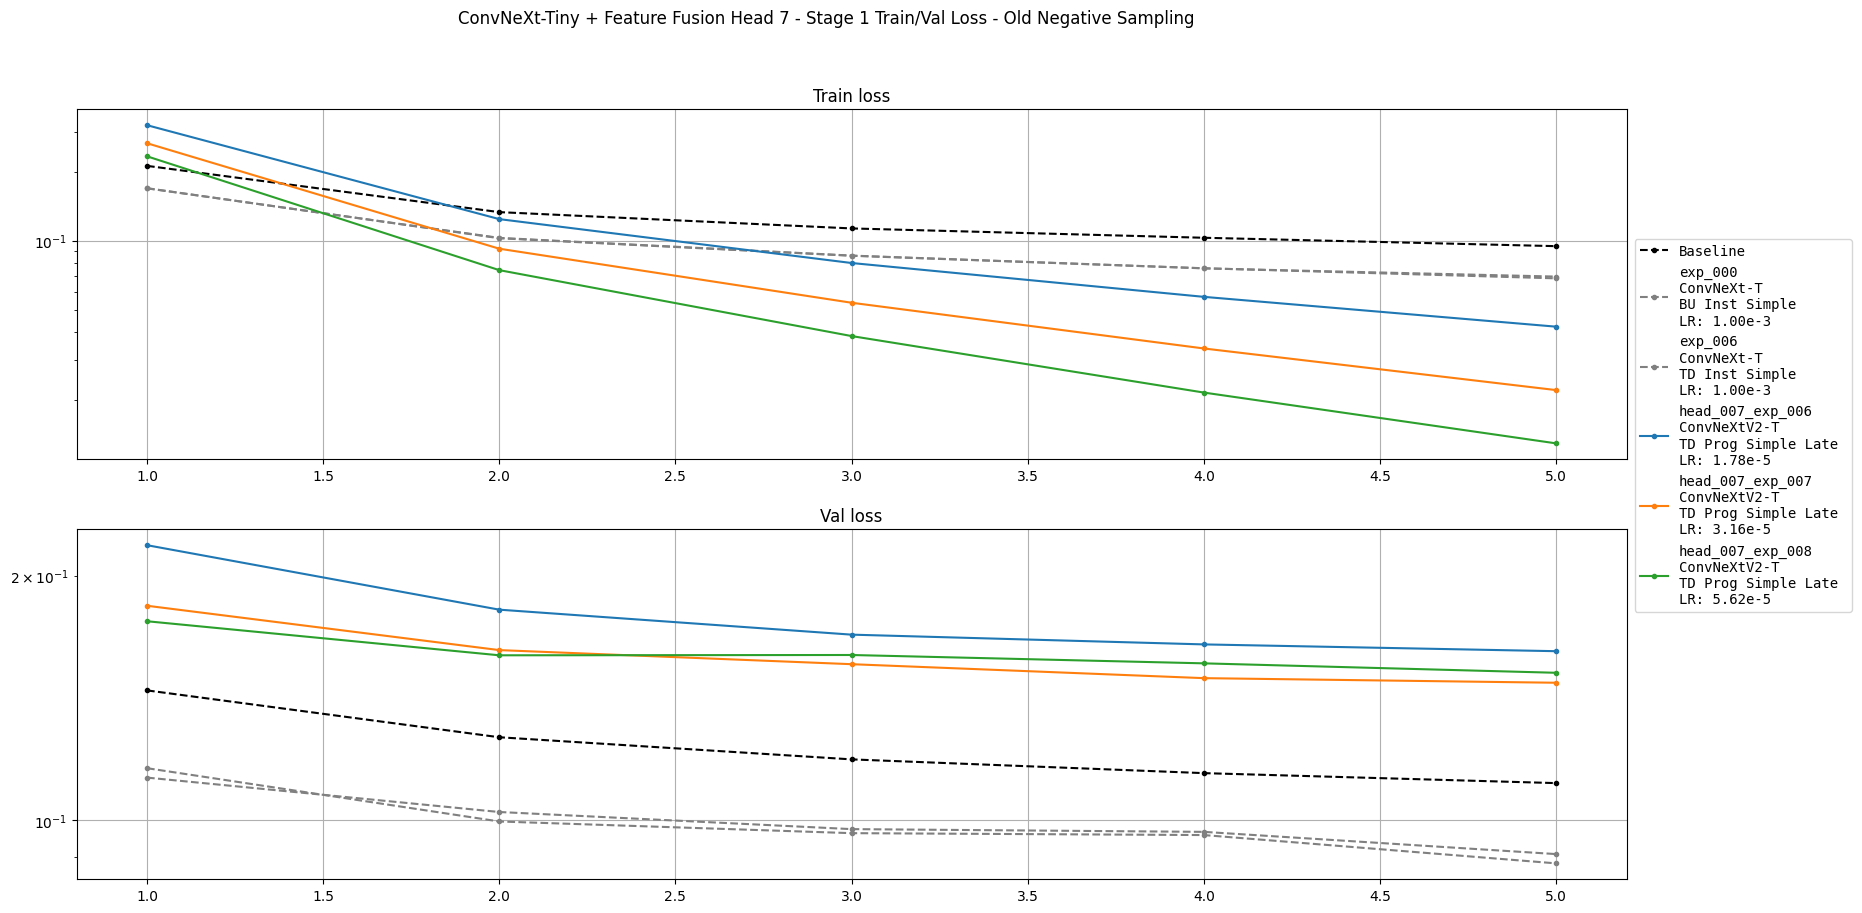

In [36]:
for desired_head_num in [7]:

    exp_name_list = []
    exp_data_list = []

    for exp_name, exp_data in exp_data_all["ret_train_old_smpl"]["convnext_v2_t_s1"].items():
        tkns = exp_name.split("_")
        head_num = int(tkns[1])
        exp_num = int(tkns[3])
        if head_num == desired_head_num:
            exp_name_list.append(exp_name)
            exp_data_list.append(exp_data)

    plot_losses(
        exp_name_list,
        exp_data_list,
        desired_head_num,
        num_epochs=10 if desired_head_num in [1, 2] else 5
    )

---

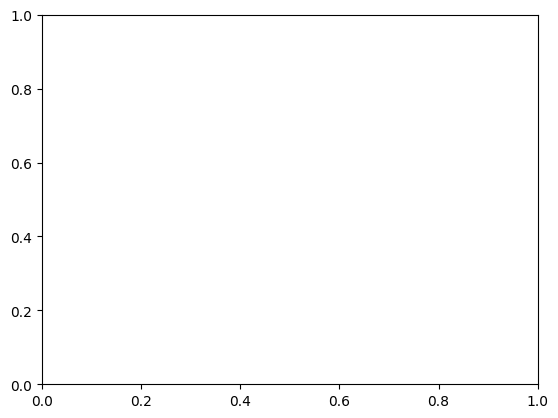

In [12]:
def plot_lr_study(
    exp_name_list,
    exp_data_list,
    split,
    epoch_num=5,
    plot_size=8,
    log_x_margin=0.05,
    log_y_margin=0.05,
    ax=plt.gca()
):

    # Baseline

    exp_data = exp_data_all["ret_train"]["convnext_t"]["test_002"]

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

    if split == "train":
        loss_list = train_loss_list
    else:
        loss_list = val_loss_list
        print("Baseline", ":", loss_list)

    finished = exp_data["results"]["stage_1"]["finished"]

    label = "Baseline"

    epoch_num_corr = min(len(loss_list), epoch_num)
    ax.axhline(loss_list[epoch_num_corr-1], color="black", linestyle="--")

    # Baseline 2

    for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["convnext_t_s1"].items()):

        if exp_name not in ["exp_000", "exp_006"]:
            continue

        # Load data

        train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
        val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

        if split == "train":
            loss_list = train_loss_list
        else:
            loss_list = val_loss_list
            print(exp_name, ":", loss_list)
            
        loss_list = loss_list[:min(5, len(loss_list))]

        finished = exp_data["results"]["stage_1"]["finished"]
        base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

        head_class = exp_data["settings"]["head"]["class"]
        head_order = "BU" if "BottomUp" in head_class else "TD"
        head_speed = "Inst" if "Instant" in head_class else "Prog"
        head_du_mode = "Simple" if "Simple" in head_class else "Conv"
        if head_speed == "Prog":
            head_weight = "Early" if exp_data["settings"]["head"]["emb_sizes"][0] == 512 else "Late"
        else:
            head_weight = ""

        # Title

        title_lines = []    
        title_lines.append("{:s}".format(exp_name))
        if not finished: title_lines[-1] += " | Unifinished"
        title_lines.append("ConvNeXt-T")
        title_lines.append("{:2s} {:4s} {:6s} {:5s}".format(
            head_order,
            head_speed,
            head_du_mode,
            head_weight
        ))
        title_lines.append("LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))

        label = "\n".join(title_lines)
        
        # Plot

        ax.axhline(loss_list[epoch_num_corr-1], color="gray", linestyle="--")

    # Plot

    init_lr_list = []
    exp_gamma_list = []
    final_loss_list = []
    epoch_num_corr_list = []

    for exp_idx, (exp_name, exp_data) in enumerate(zip(exp_name_list, exp_data_list)):

        if split == "train":
            loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
        else:
            loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]
            print(exp_name, ":", loss_list)

        init_lr_list.append(exp_data["settings"]["stage_1"]["optimizer"]["lr"])
        exp_gamma_list.append(exp_data["settings"]["stage_1"]["scheduler"]["gamma"])
        epoch_num_corr = min(len(loss_list), epoch_num)
        epoch_num_corr_list.append(epoch_num_corr)
    
        final_loss_list.append(loss_list[epoch_num_corr-1])

    ax.scatter(init_lr_list, final_loss_list)

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(True)

    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1] * (1 + 2 * log_y_margin))

    xlim = ax.get_xlim()
    ax.set_xlim(xlim[0] / (1 + log_x_margin), xlim[1] * (1 + log_x_margin))

    for init_lr, exp_gamma, final_loss, epoch_num_corr in zip(init_lr_list, exp_gamma_list, final_loss_list, epoch_num_corr_list):
        text = "{:s}\nEp {:d}".format(
            np.format_float_scientific(init_lr, min_digits=2, exp_digits=1),
            epoch_num_corr
        )
        ax.text(init_lr, final_loss * (1 + log_y_margin), text, ha="center")

    ax.set_xlabel("Stage 1 initial learning rate")
    ax.set_ylabel("Stage 1 epoch {:d} {:s} loss".format(epoch_num_corr, split))

    print()


Baseline : [0.14446967095136642, 0.1265124175697565, 0.11882583238184452, 0.11428552493453026, 0.11110064946115017, 0.10844763368368149, 0.10666633956134319, 0.10538673214614391, 0.10422810725867748, 0.10317414253950119, 0.10254322551190853, 0.10156943462789059, 0.1007042694836855, 0.10049333982169628, 0.10006355680525303, 0.0999007485806942, 0.09933974035084248, 0.09902817569673061, 0.09874184802174568, 0.09821609407663345, 0.09801040403544903, 0.09770748391747475, 0.09772988222539425, 0.09752206318080425, 0.09744497761130333, 0.0971205122768879, 0.09717748872935772, 0.09711083769798279, 0.09702188707888126, 0.09691018424928188]
exp_000 : [0.11589726991951466, 0.09965924359858036, 0.09641437418758869, 0.09589802473783493, 0.08850623108446598, 0.08780345693230629, 0.08649440854787827, 0.08410575613379478, 0.08386480808258057, 0.0824354737997055, 0.08349793031811714, 0.08142169937491417, 0.08093246445059776, 0.08055069670081139, 0.07954813912510872, 0.07976939156651497, 0.0803753696382

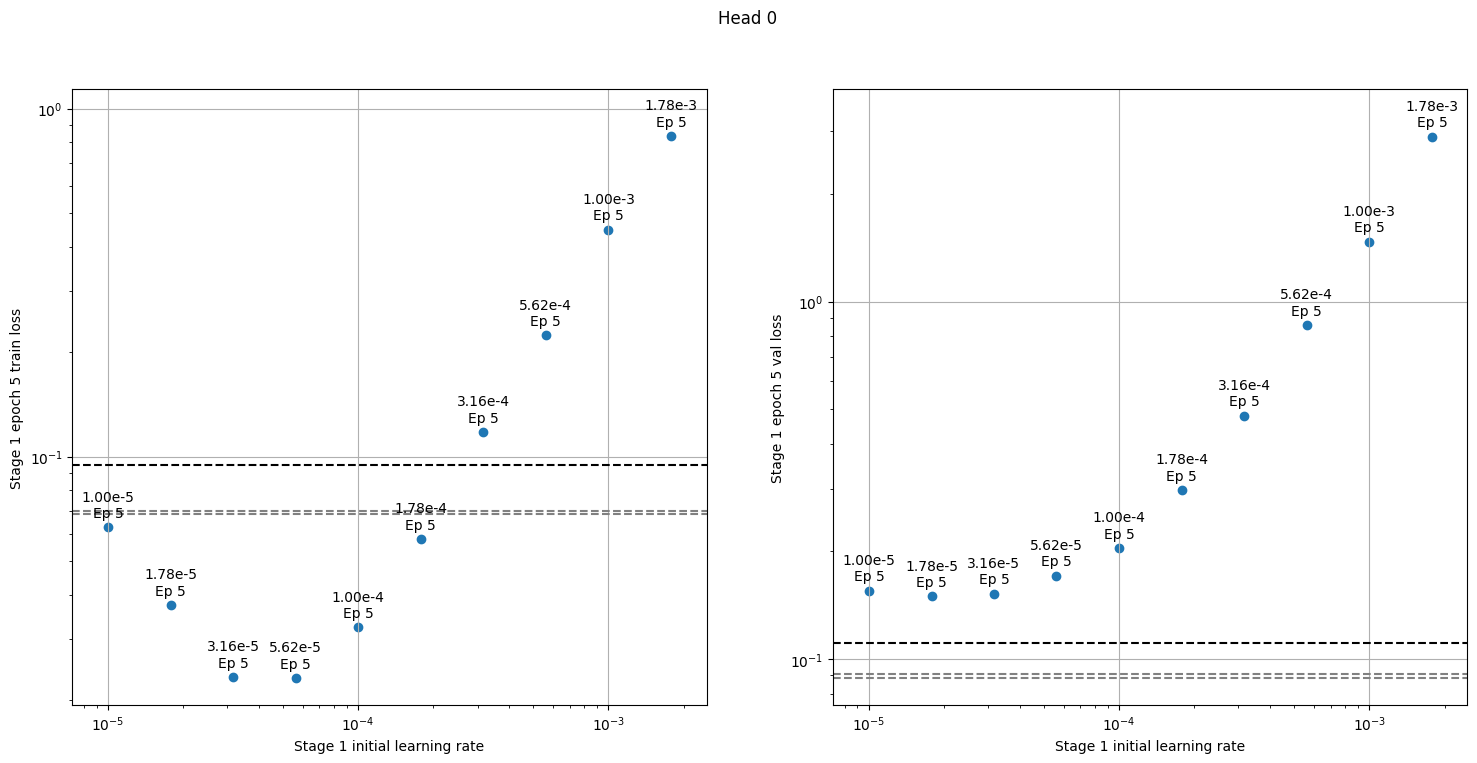

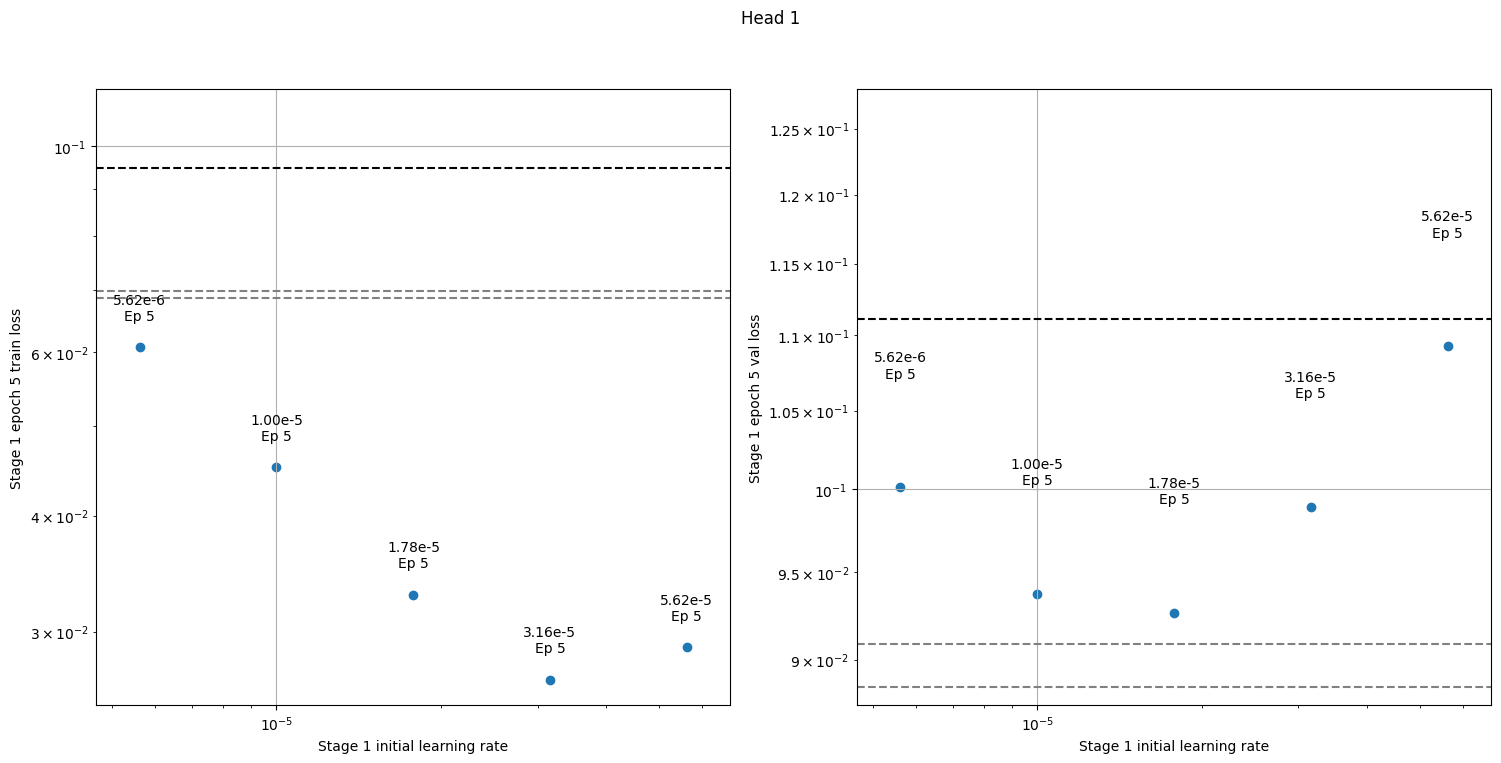

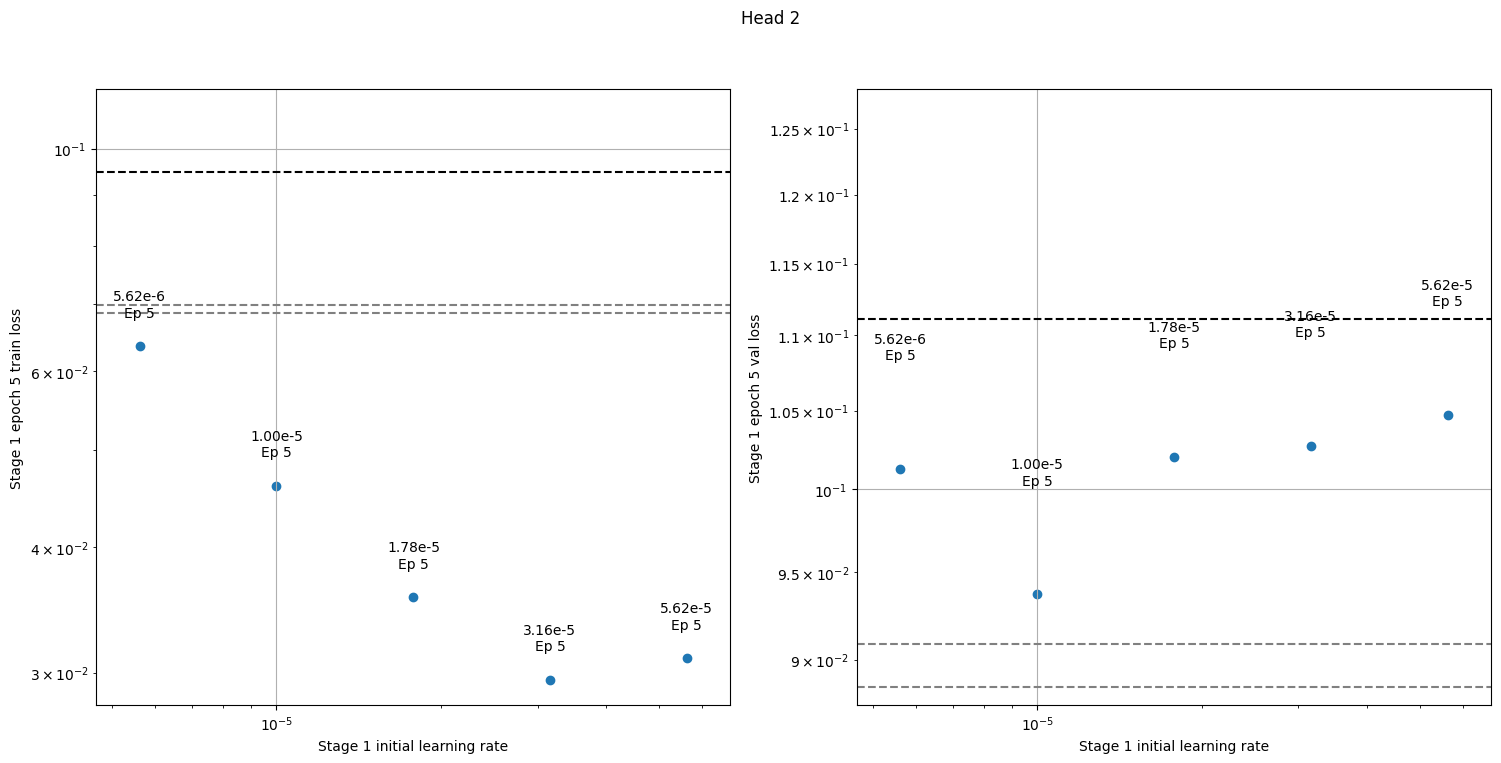

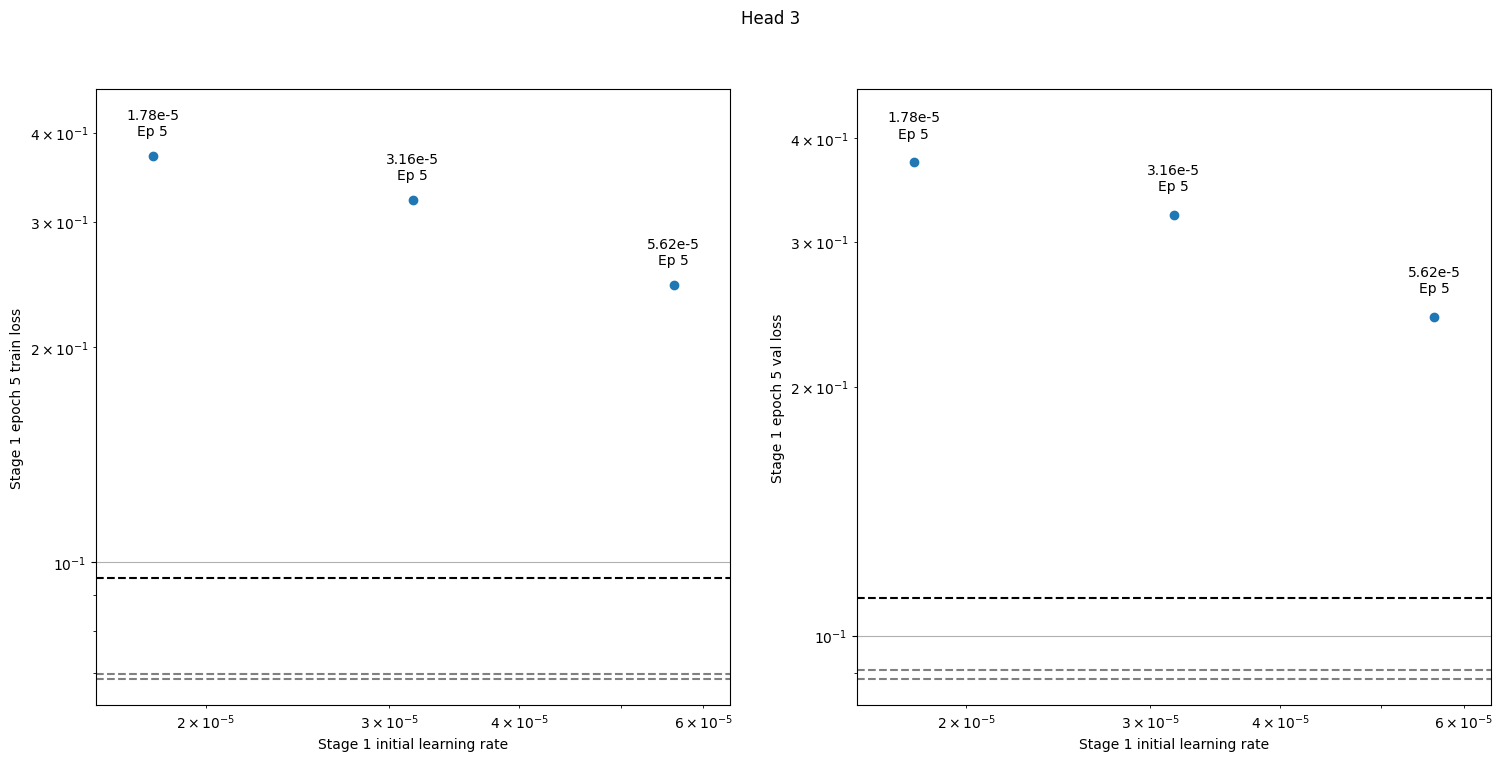

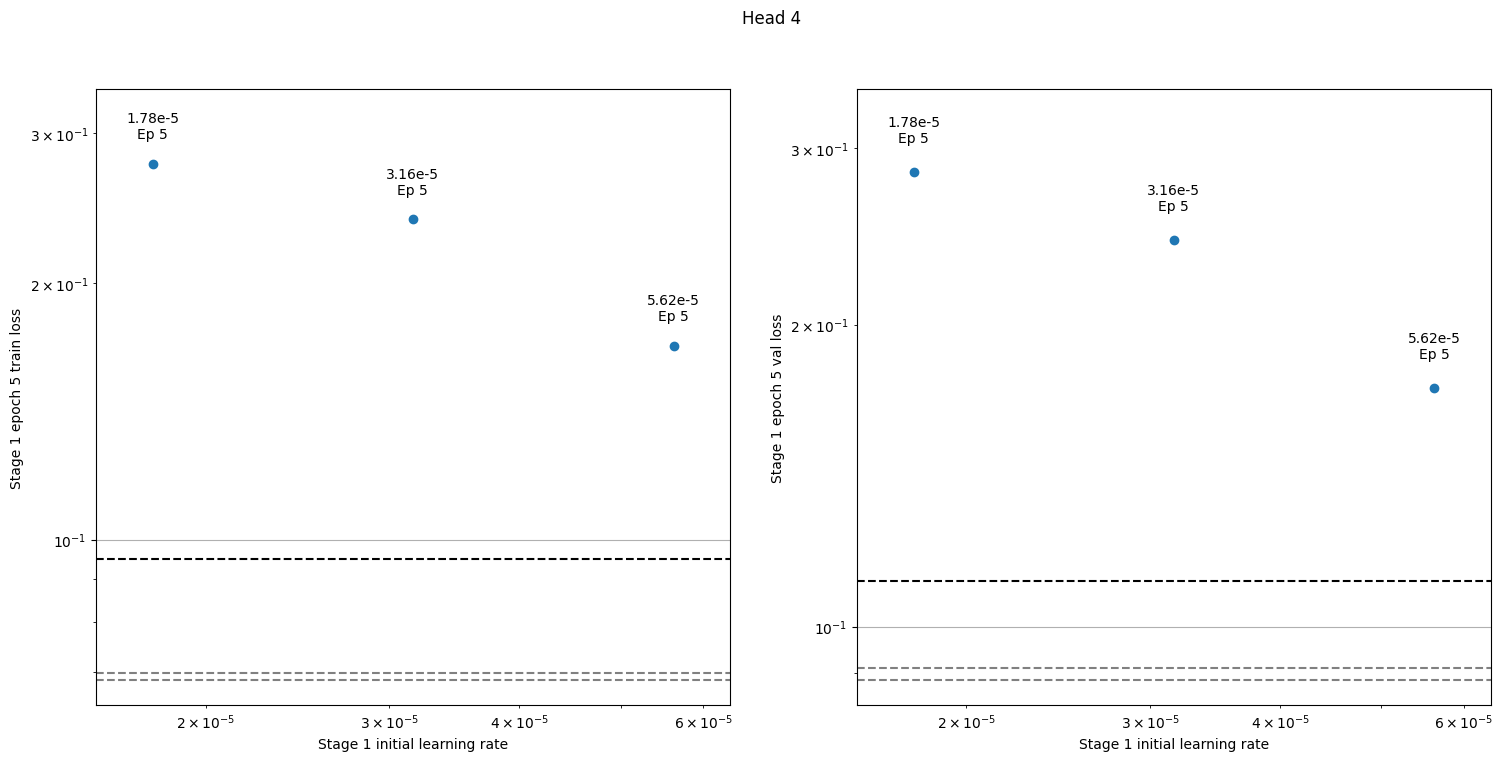

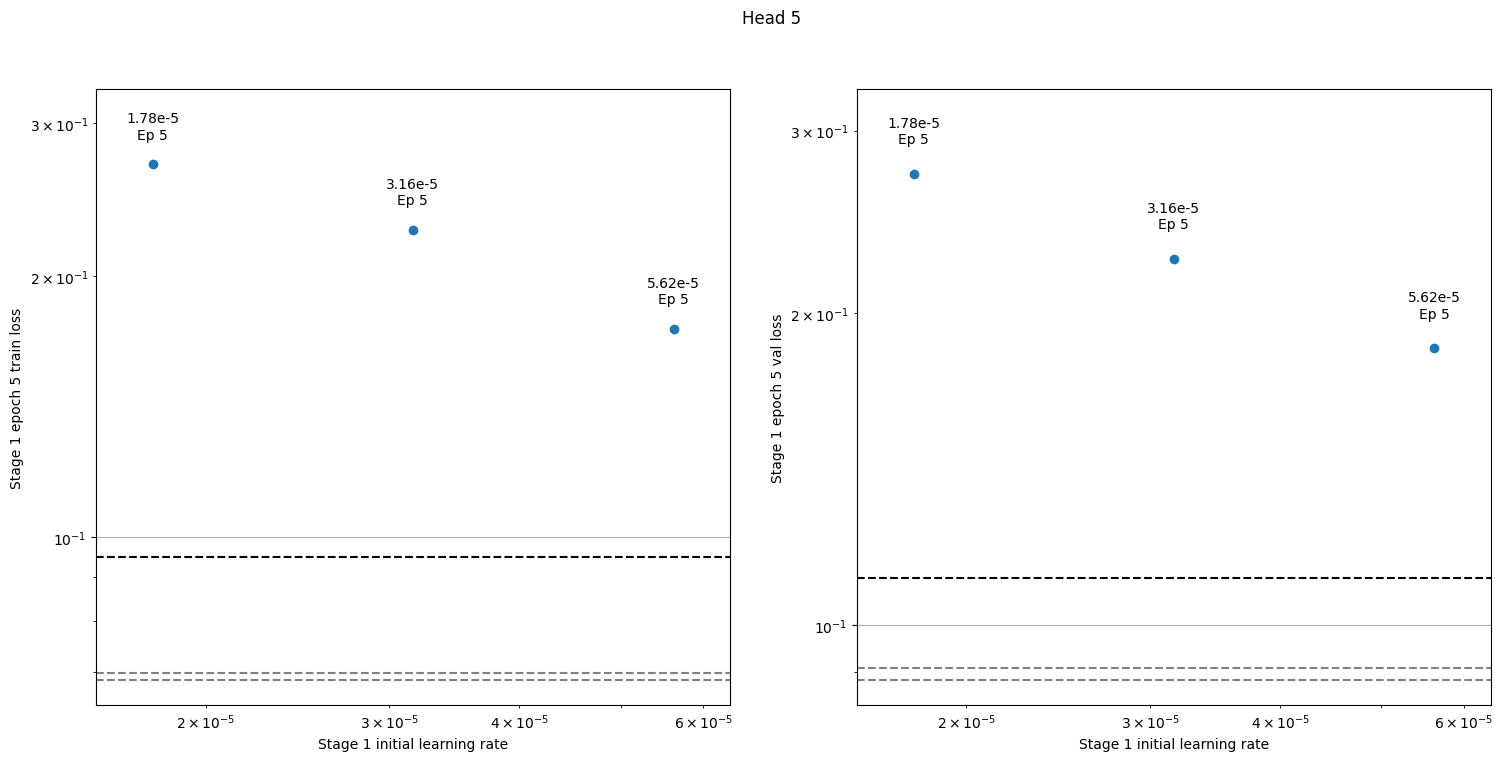

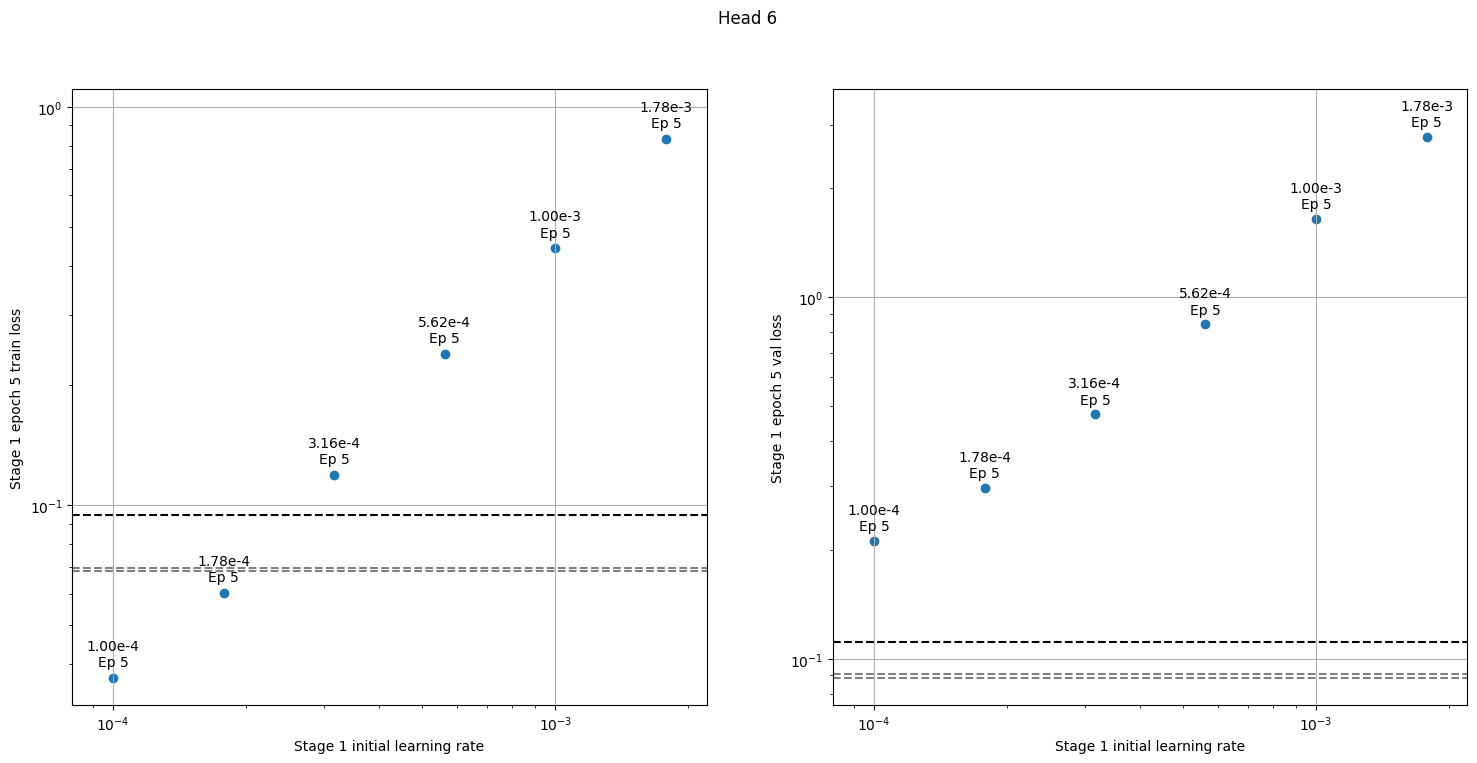

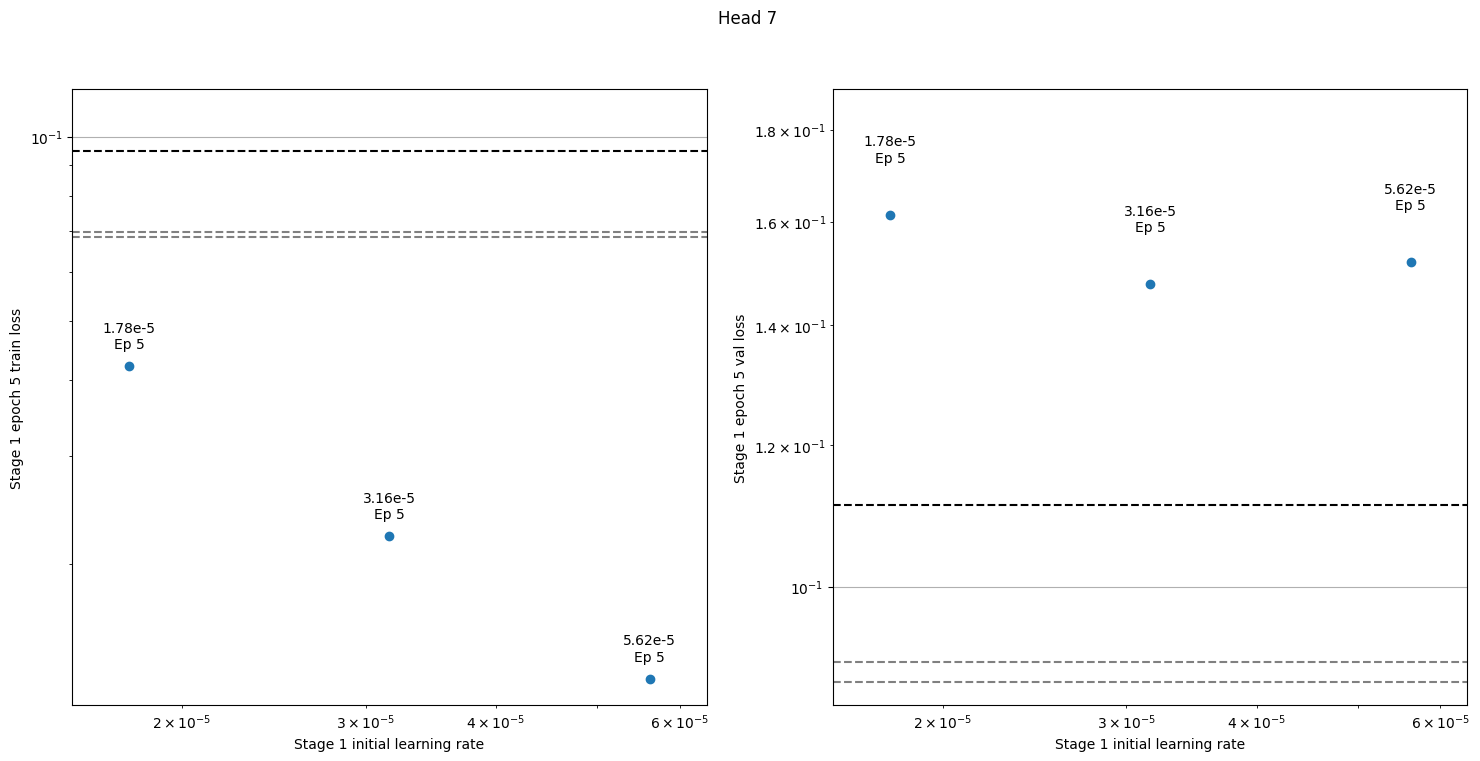

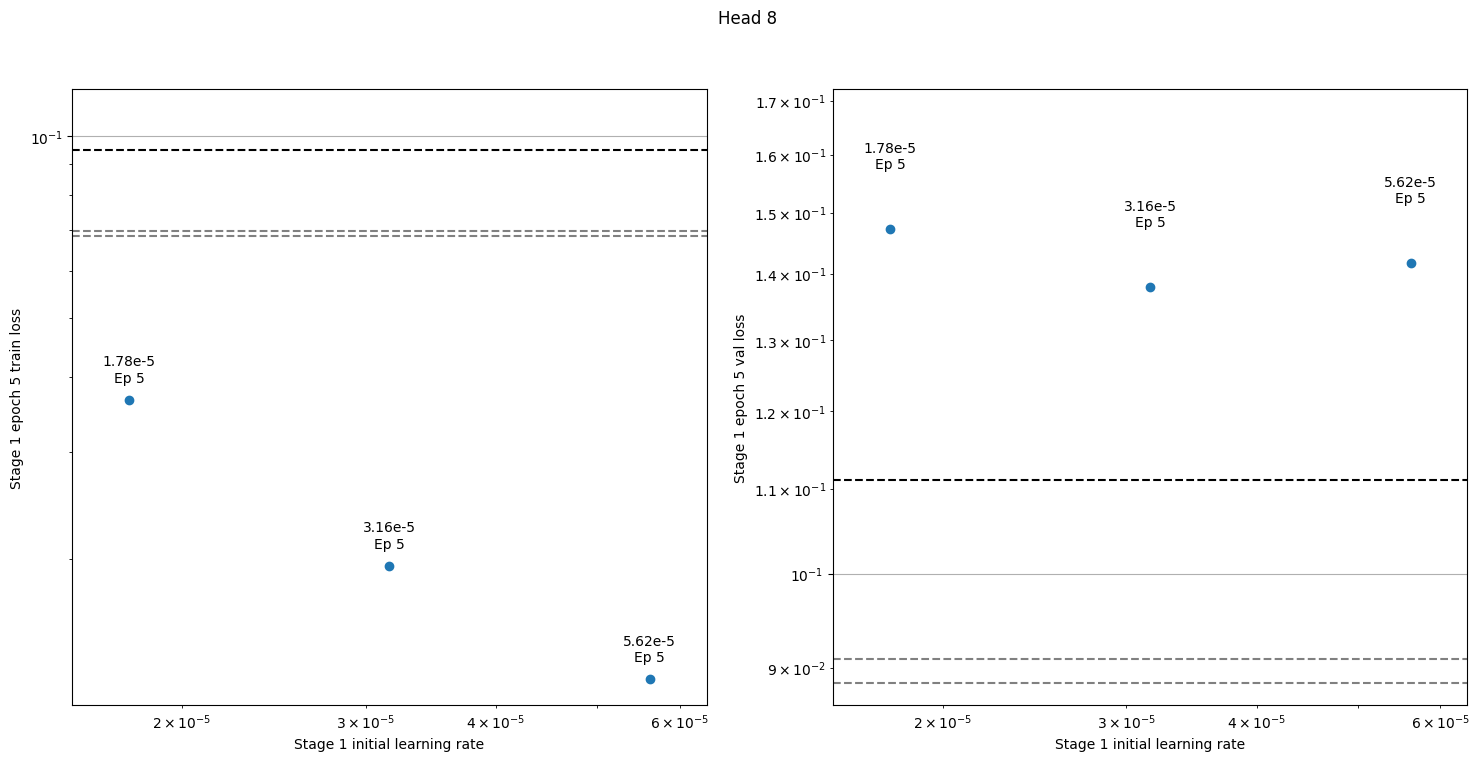

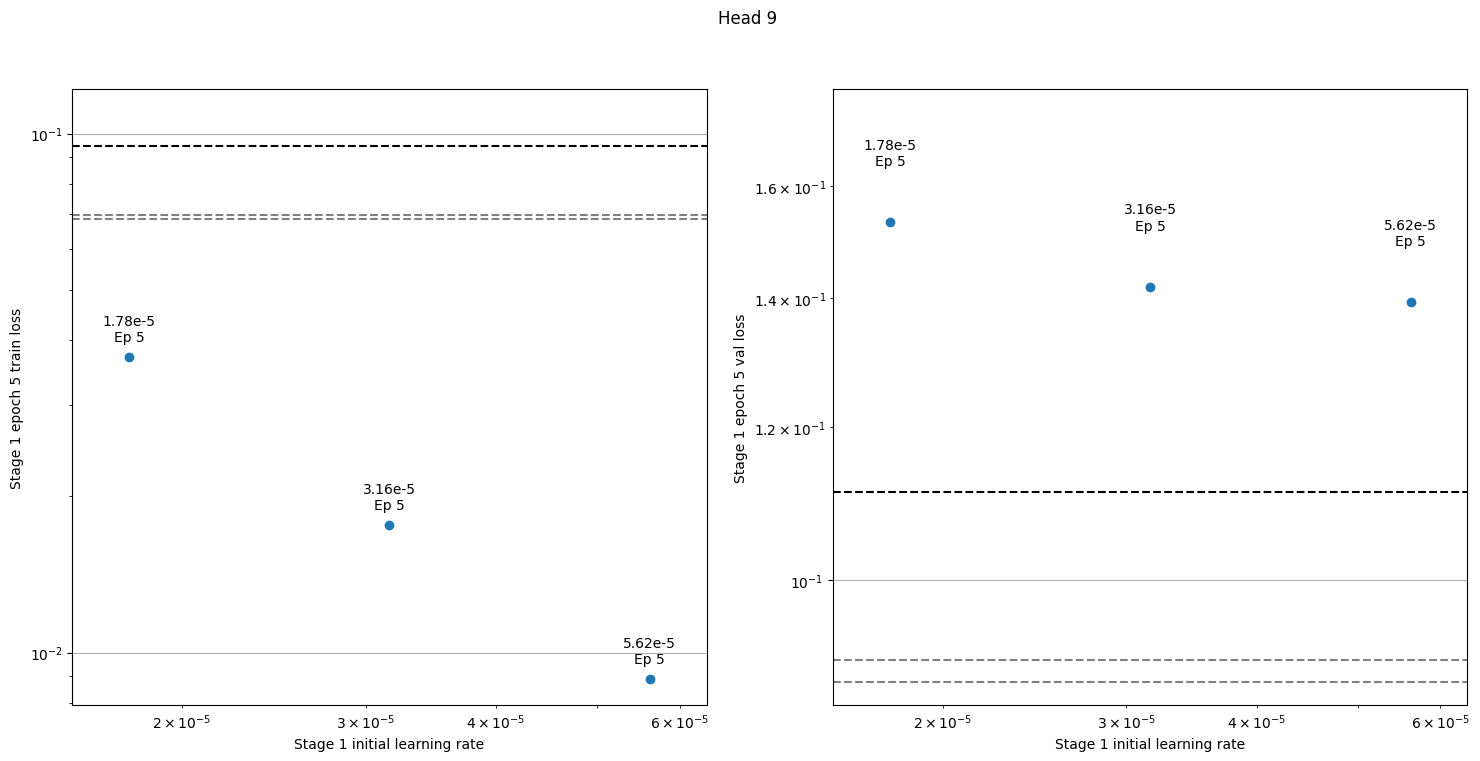

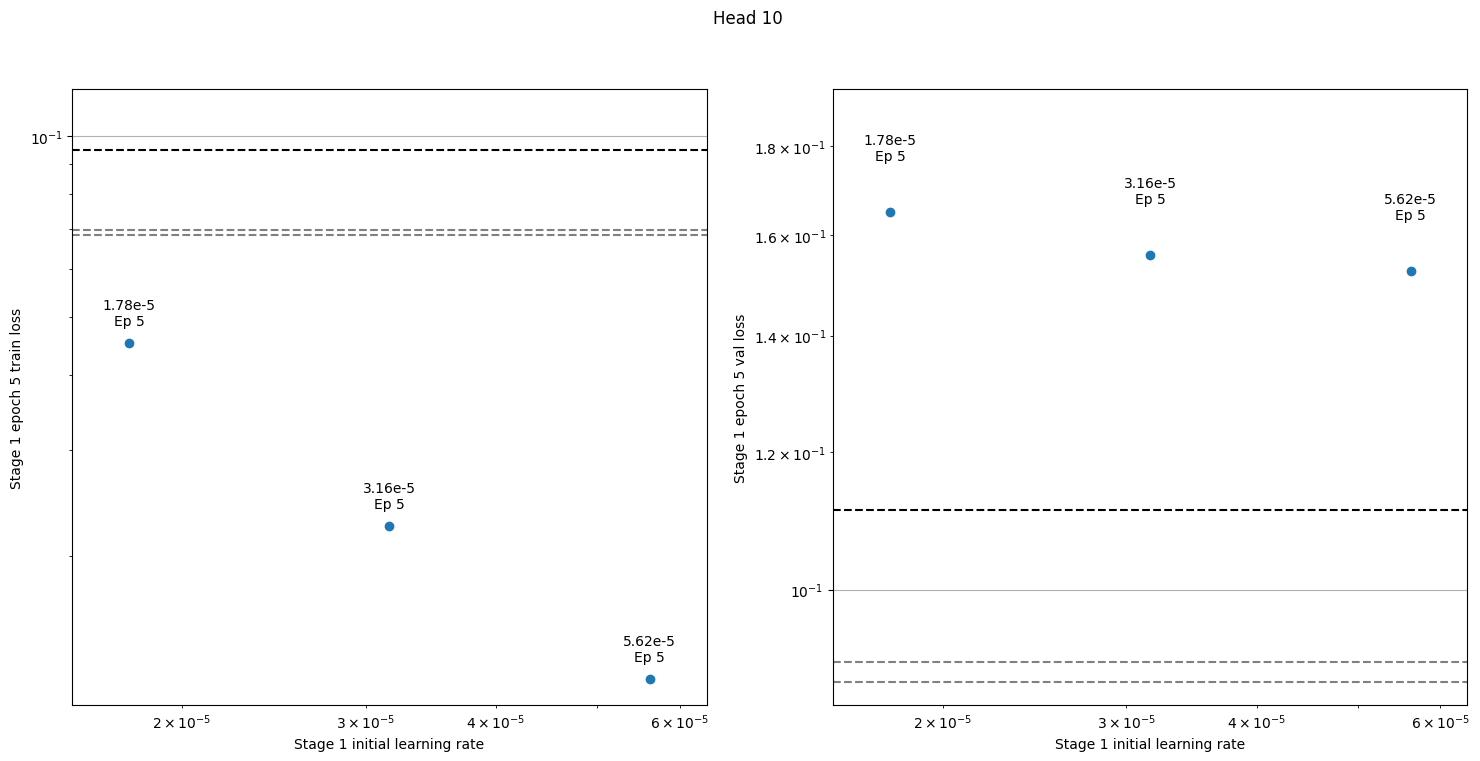

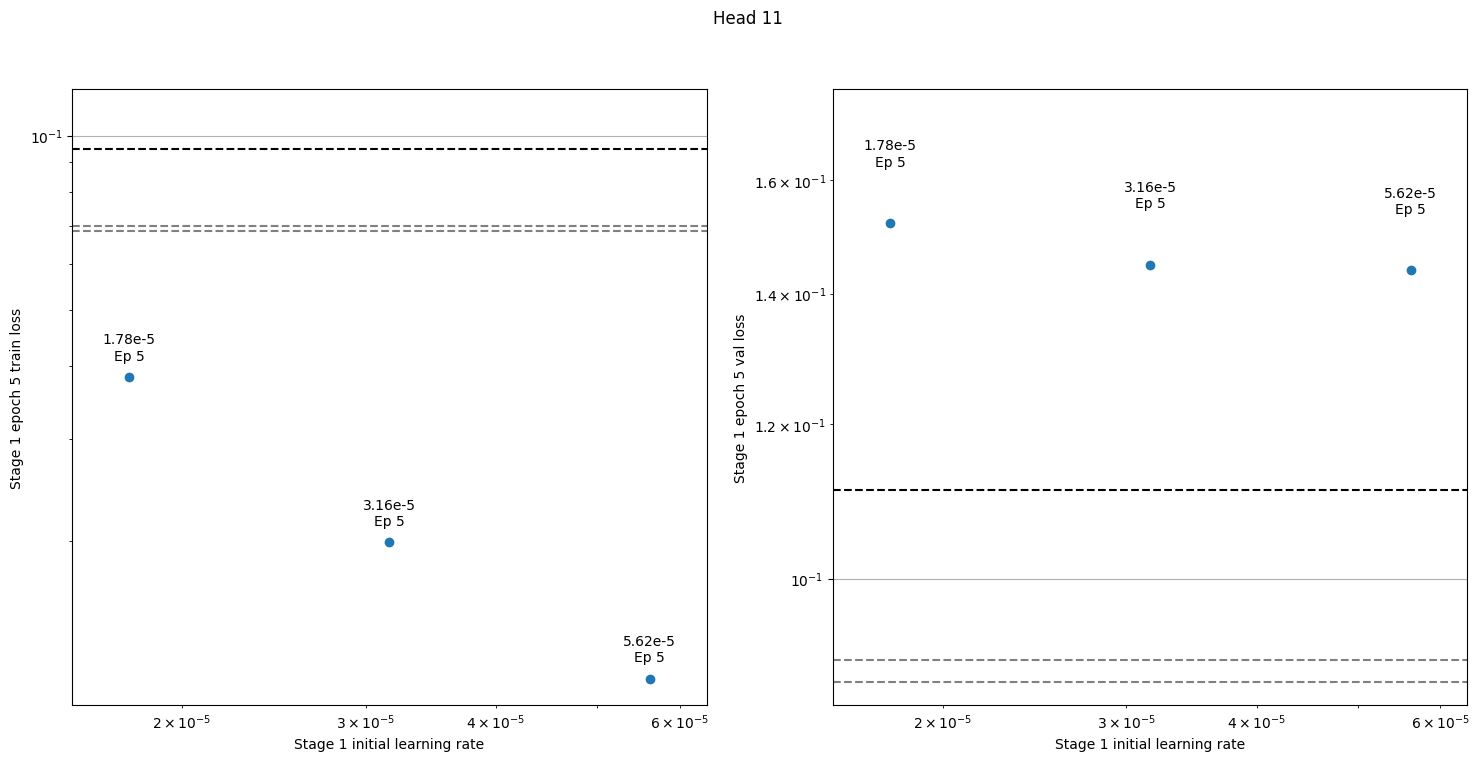

In [13]:
for idx in range(12):

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    axs = axs.flatten()

    exp_name_list = []
    exp_data_list = []

    for exp_name, exp_data in exp_data_all["ret_train_old_smpl"]["convnext_v2_t_s1"].items():
        tkns = exp_name.split("_")
        head_num = int(tkns[1])
        exp_num = int(tkns[3])
        if head_num == idx:
            exp_name_list.append(exp_name)
            exp_data_list.append(exp_data)

    plot_lr_study(
        exp_name_list,
        exp_data_list,
        split="train",
        epoch_num=5,
        log_x_margin=0.07,
        log_y_margin=0.07,
        ax=axs[0]
    )

    plot_lr_study(
        exp_name_list,
        exp_data_list,
        split="val",
        epoch_num=5,
        log_x_margin=0.07,
        log_y_margin=0.07,
        ax=axs[1]
    )

    plt.suptitle("Head {:d}".format(idx))

plt.show()